In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-18.322725,-16.672157,Syn
1,-54.868546,-18.410553,Syn
2,-45.054012,13.397923,Syn
3,-39.239132,-16.504389,Syn
4,-46.235340,1.965008,Syn


In [2]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-4.541570,-11.997326,Syn
1,-49.244247,-6.464272,Syn
2,-13.750749,8.129172,Syn
3,-34.420837,-13.216851,Syn
4,-25.592207,4.358292,Syn


In [3]:
def euclidean_distance(*args):
    return np.sqrt(np.sum((args[0] - args[1]) ** 2))

In [4]:
samples = df_tsne.sample(100)

In [5]:
samples_no_benign = df_tsne_no_benign.sample(100)

<Axes: >

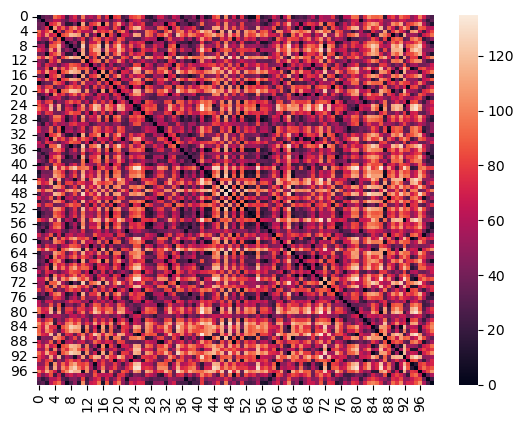

In [6]:
# compute the distance matrix between all the points
distance_matrix = np.zeros((samples[['PC1', 'PC2']].shape[0], samples[['PC1', 'PC2']].shape[0]))
for i in range(samples[['PC1', 'PC2']].shape[0]):
    for j in range(samples[['PC1', 'PC2']].shape[0]):
        distance_matrix[i, j] = euclidean_distance(samples[['PC1', 'PC2']].iloc[i], samples[['PC1', 'PC2']].iloc[j])

sns.heatmap(distance_matrix)

<Axes: >

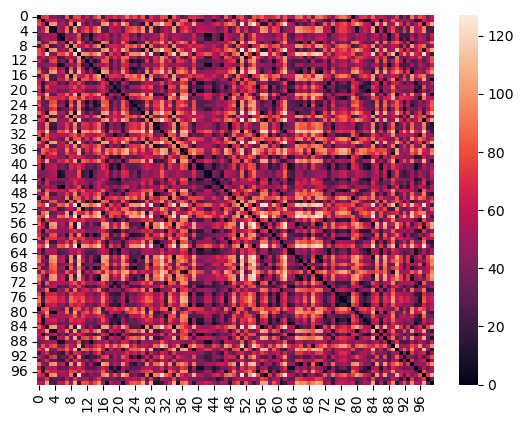

In [7]:
distance_matrix = np.zeros((samples_no_benign[['PC1', 'PC2']].shape[0], samples_no_benign[['PC1', 'PC2']].shape[0]))
for i in range(samples_no_benign[['PC1', 'PC2']].shape[0]):
    for j in range(samples_no_benign[['PC1', 'PC2']].shape[0]):
        distance_matrix[i, j] = euclidean_distance(samples_no_benign[['PC1', 'PC2']].iloc[i], samples_no_benign[['PC1', 'PC2']].iloc[j])

sns.heatmap(distance_matrix)

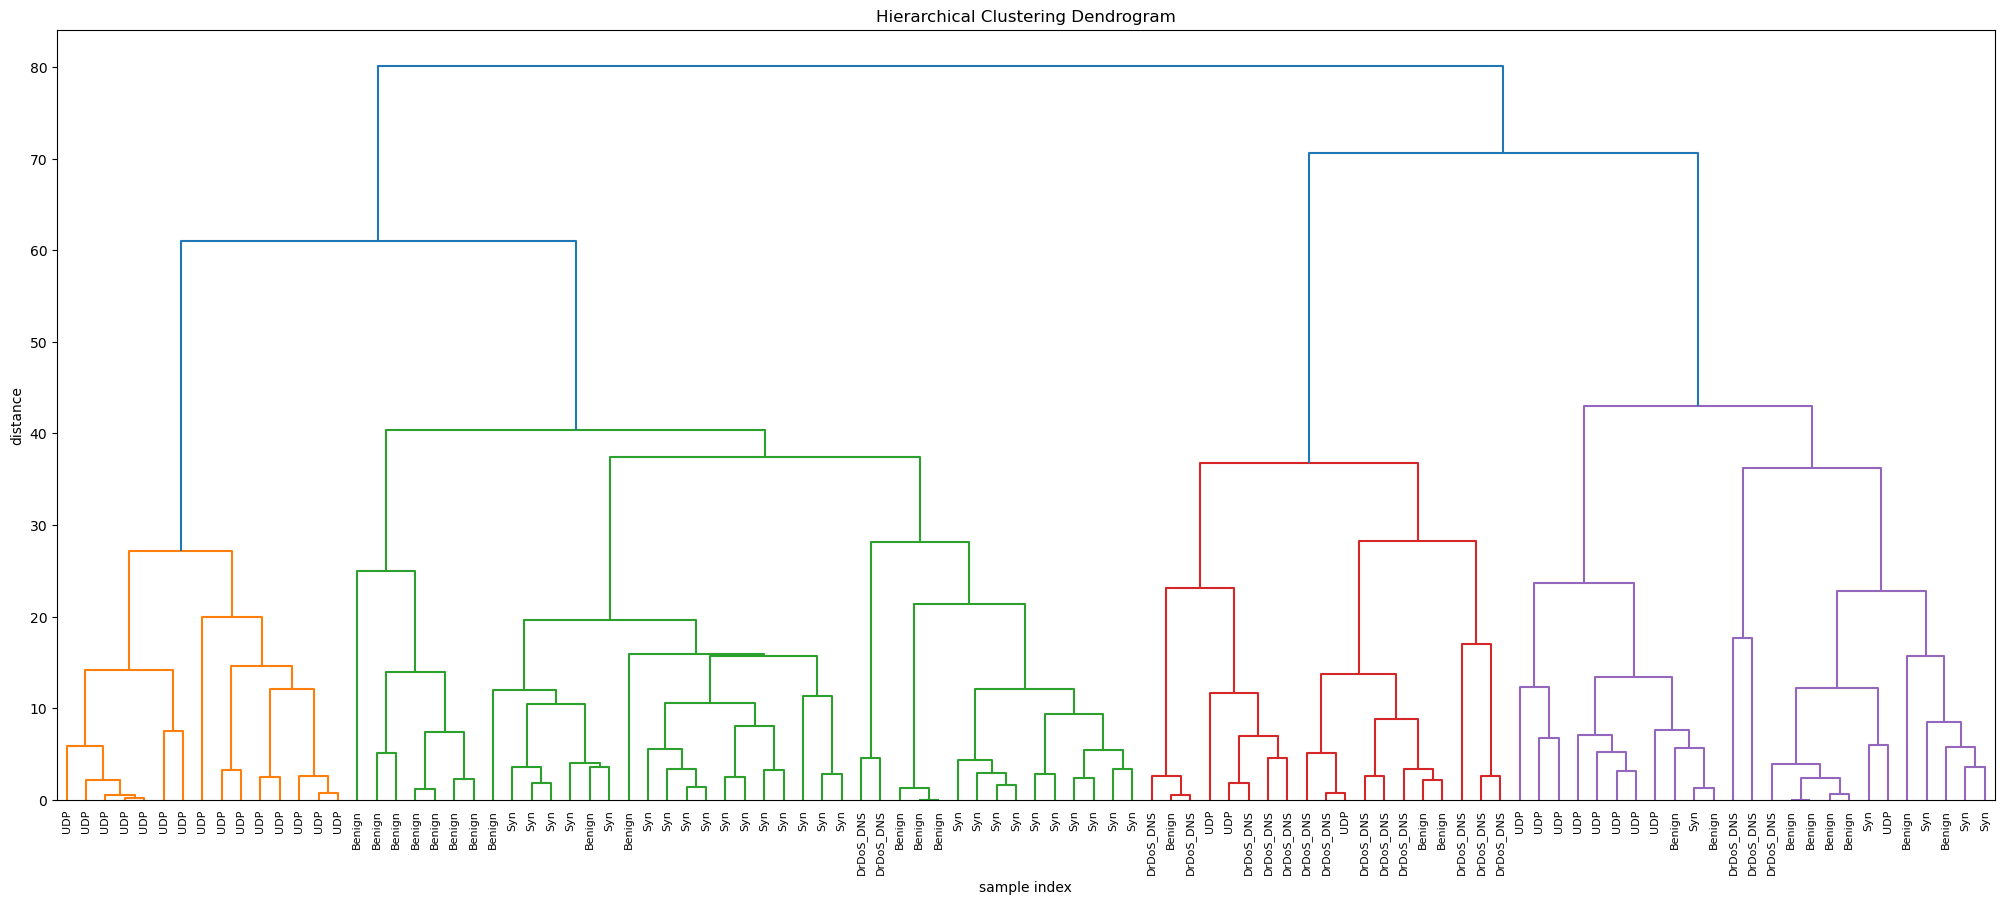

In [8]:
# import linkage
from scipy.cluster.hierarchy import linkage

# compute the linkage matrix
Z = linkage(samples[['PC1', 'PC2']], method='average', metric='euclidean')

# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=samples['Label'].values)
plt.show()

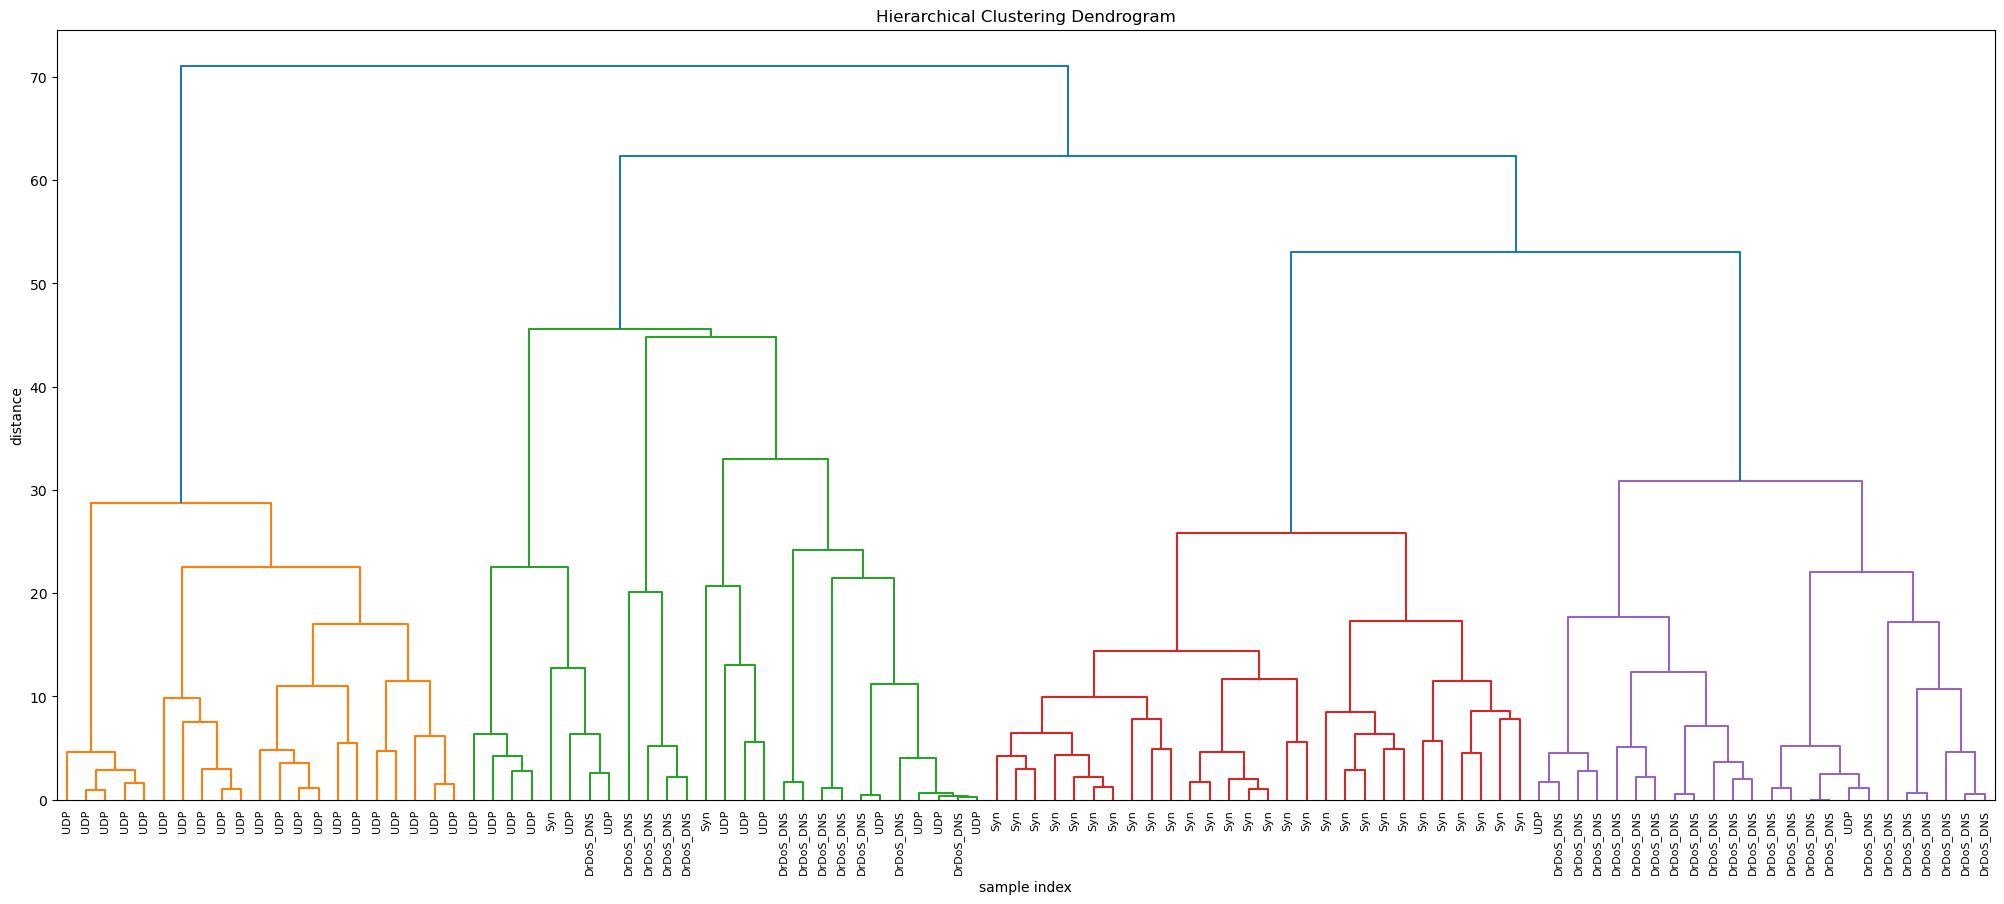

In [9]:
Z_no_benign = linkage(samples_no_benign[['PC1', 'PC2']], method='average', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_no_benign, leaf_rotation=90., leaf_font_size=8., labels=samples_no_benign['Label'].values)
plt.show()

We can see that without the Benign class, the hierarchical clustering with euclidean distance has very good results on the 3 classes. We clearly see 3 clusters (orange, green and red) corresponding to each class. However, we still have One big cluster with a mix of UDP, DrDoS_DNS and a little bit of Syn.

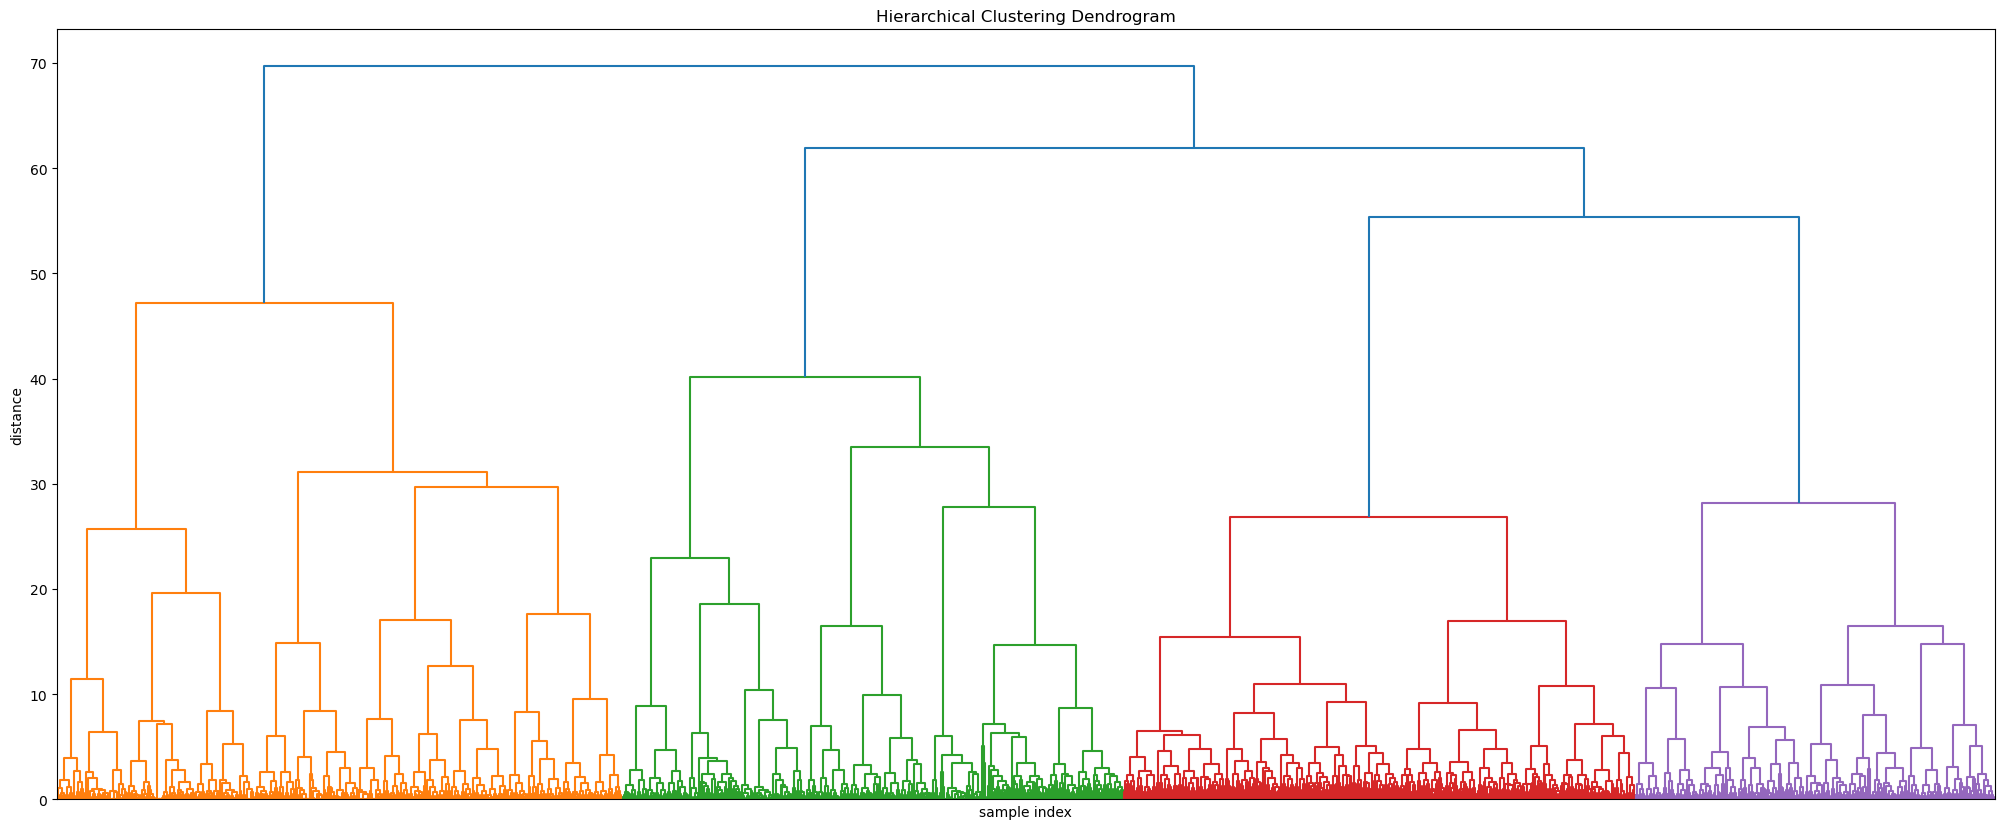

In [10]:
Z_full = linkage(df_tsne_no_benign[['PC1', 'PC2']], method='average', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_full, leaf_rotation=90., leaf_font_size=8., no_labels=True)
plt.show()

We can see that we have 4 main clusters (orange, green, red and blue) whereas we should get only 3 classes. Let's see the proportions of each class in each cluster.

In [11]:
# cut_tree at 50
from scipy.cluster.hierarchy import cut_tree

df_tsne_no_benign['hierarchical'] = cut_tree(Z_full, n_clusters=4)
df_tsne_no_benign.head()

,PC1,PC2,Label,hierarchical
0,-4.541570,-11.997326,Syn,0
1,-49.244247,-6.464272,Syn,1
2,-13.750749,8.129172,Syn,1
3,-34.420837,-13.216851,Syn,1
4,-25.592207,4.358292,Syn,1


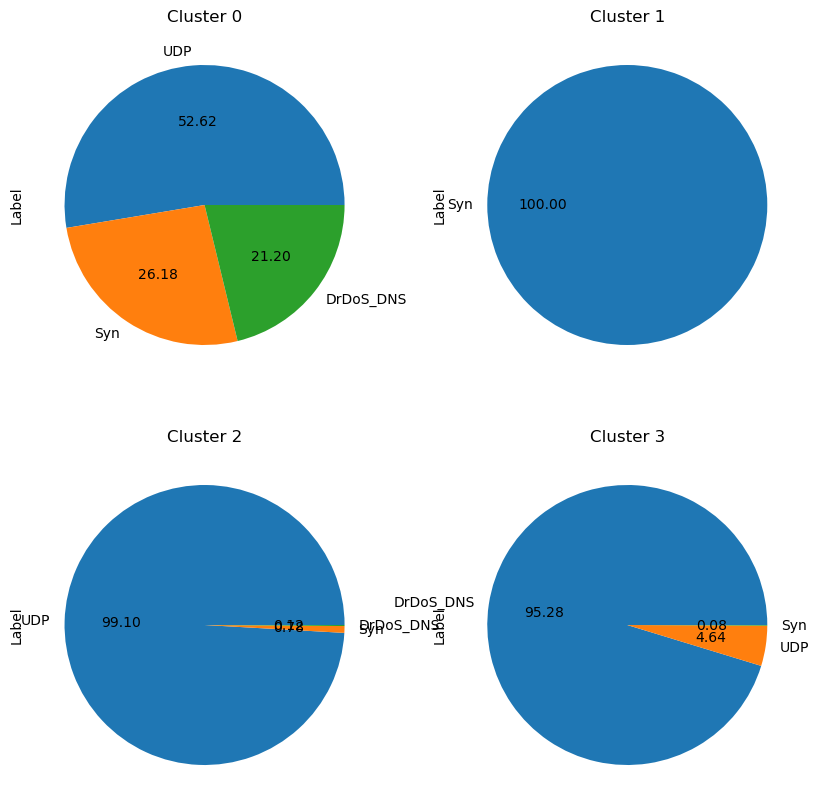

In [12]:
# create a plot grid of 2x2
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# plot the pie charts of distributions of labels for each cluster
for i in range(4):
    df_tsne_no_benign[df_tsne_no_benign['hierarchical'] == i]['Label'].value_counts().plot.pie(ax=ax[i // 2, i % 2], title='Cluster {}'.format(i), autopct='%.2f')
plt.show()


We can see that we have 3 clusters that are almost only composed of one class (more than 95%). There is one cluster corresponding to 25% of the total dataset that is not composed by only one class. We can see that this cluster is composed of 52% of UDP, 21% of DrDoS_DNS and 26% of Syn. This is the cluster that we saw on the dendrogram that was composed of UDP, DrDoS_DNS and Syn.

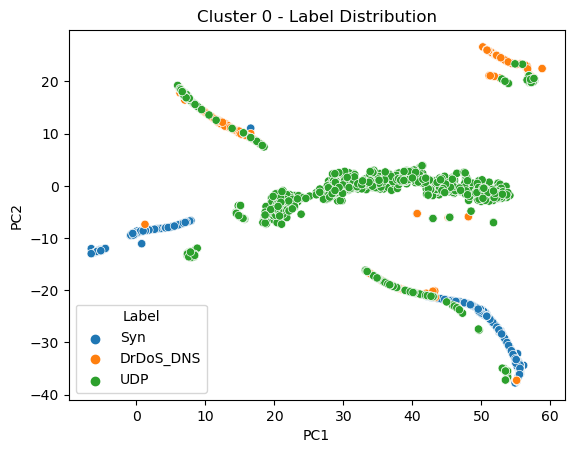

In [18]:
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne_no_benign[df_tsne_no_benign['hierarchical'] == 0])
plt.title('Cluster 0 - Label Distribution')
plt.show()